# Notebook for 8/30/2021 seminar on Haliburton pmag pole 

The current goal of this notebook is to show the Laurentia paleomagnetic pole compilation in the Mesoproterozoic to Neoproterozoic from the older Logan Loop to the Keweenawan Track and to the younger Grenville Loop. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib
import matplotlib.colors as colors
from scipy.constants import Julian_year
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
Laurentia_outline = ShapelyFeature(Reader('../data/Laurentia_shape/Laurentia.shp').geometries(),
                                ccrs.PlateCarree(), facecolor = 'none', edgecolor='black')

## the Laurentia APWP

In [13]:
poles = pd.read_csv('../data/Laurentia_poles/Laurentia_poles.csv')
poles = poles[8:28]
poles

,Unnamed: 0,PoleName,SLat,SLon,PLat,PLon,A95,K,N,PolarityZone,PmagRef,AgeNominal,AgeLower,AgeUpper,AgeInfo,AgeRef,Gaussian_2sigma,GaussianOrUniform,Q,color
8,Mackenzie,Mackenzie dykes grand mean,65.00,250.00,4.0,190.0,5.0,NaN,5.0,NaN,"Buchan et al., 2000",1267.00,1265.00,1269.00,NaN,NaN,NaN,NaN,NaN,NaN
9,Sudbury,Sudbury Dykes Combined,46.30,278.60,-2.5,192.8,2.5,NaN,52.0,NaN,"Palmer,H.C., Merz,B.A., Hayatsu,A., 1977",1237.00,1232.00,1242.00,NaN,NaN,NaN,NaN,NaN,NaN
10,Lamp_dikes,Lamprophyre dikes,48.80,273.30,58.0,223.3,9.2,37.8,19.0,multiple polarity,"Piispa et al., 2018",1144.00,1130.00,1155.00,U-Pb perovskite and Ar-Ar phlogopite dates,Queen et al. (1996),NaN,NaN,NaN,NaN
11,Abitibi_dikes,Abitibi dykes,48.00,279.00,44.4,211.4,13.5,NaN,8.0,multiple polarity,Ernst and Buchan (1993) and Halls et al. (2005...,1141.00,1139.00,1143.00,U-Pb date on baddeleyite,Krogh et al. 1987,NaN,NaN,NaN,NaN
12,Osler_R1,Osler reverse (lower),48.80,272.34,40.9,218.6,4.8,31.5,30.0,Alona Bay reversed-polarity zone,"Swanson-Hysell et al., 2014b",1108.00,1105.15,1110.00,Older than 1105.15 $\pm$ 0.33 Ma Osler reverse...,"Davis and Sutcliffe, 1985; this study",NaN,uniform,7.0,#B82431
13,Osler_R2,Osler reverse (upper),48.59,271.81,42.3,203.4,3.7,24.4,64.0,Alona Bay reversed-polarity zone,"Halls, 1974; Swanson-Hysell et al., 2014b; thi...",1105.15,1104.82,1105.48,$^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date of...,this study,0.33,gaussian,7.0,#F2A07E
14,MP_lowerR1,Mamainse lower reversed 1,47.10,275.29,49.5,227.0,5.3,31.7,24.0,Alona Bay reversed-polarity zone,"Swanson-Hysell et al., 2014a",1109.00,1106.00,1112.00,Likely older than ca. 1105 Ma given distinct h...,NaN,NaN,uniform,7.0,#930E26
15,MP_lowerR2,Mamainse lower reversed 2,47.09,275.27,37.5,205.2,4.5,78.6,14.0,Alona Bay reversed-polarity zone,"Swanson-Hysell, 2014a",1105.00,1100.40,1109.00,Older than $^{\mathrm{206}}$Pb/$^{\mathrm{238}...,"Swanson-Hysell, 2014a",NaN,uniform,7.0,#F8C1A6
16,MP_lowerNupperR,Mamainse lower normal and upper reversed,47.07,275.26,36.1,189.7,4.9,37.3,24.0,Flour Bay normal and reversed polarity zones,"Swanson-Hysell, 2014a",1100.36,1100.10,1100.61,Age constrained by $^{\mathrm{206}}$Pb/$^{\mat...,"Swanson-Hysell, 2014a",0.25,gaussian,7.0,#6A579A
17,MP_upperN,Mamainse upper normal,47.06,275.25,31.2,183.2,2.5,94.4,34.0,Portage Lake normal-polarity zone,"Swanson-Hysell, 2014a",1094.00,1090.00,1100.00,Likely ca. 1094 Ma based on similar pole posit...,NaN,NaN,uniform,7.0,#3B7185


In [10]:
Grenville_poles = pd.read_csv('code_output/pole_means.csv')
Grenville_poles

,PoleName,SLat,SLon,PLat,PLon,A95,K,N,PolarityZone,PmagRef,AgeNominal,AgeLower,AgeUpper,AgeInfo,AgeRef,Gaussian_2sigma,GaussianOrUniform,Q,color
0,Whitestone pole,45.66,-79.87,-18.3,148.7,6.9,57.4,9,AR,"Ueno et al., 1975a",987.2,969.9,1009.2,see thermal history,"Dallmeyer et a., 1980",NaN,gaussian,NaN,#B82431
1,Haliburton pole,44.95,-78.44,-35.1,141.6,5.2,18.6,42,AR,"Buchan et al., 1973, 1976; Warnock et al., 2000",988.4,977.1,999.9,see thermal history,Berger and York 1981; Warnock 2000; Cosca 1992...,NaN,gaussian,NaN,#0000FF
2,Adirondack pole,44.20,-74.00,-31.6,133.3,28.3,1.7,36,AR+AN,"Brown et al., 2012",966.0,952.0,976.0,see thermal history,"Mezger et al., 1989, 1991, 1992; Streepey et a...",NaN,gaussian,NaN,#930E26
3,Allard Urbain pole,44.20,-74.00,-10.6,154.0,11.2,11.1,17,AR+AN,"Hargraves 1967, 1974; Robertson 1979",909.7,902.7,919.2,see thermal history,"Morisset et al., 2009",NaN,gaussian,NaN,#3B7185


<Figure size 432x432 with 0 Axes>

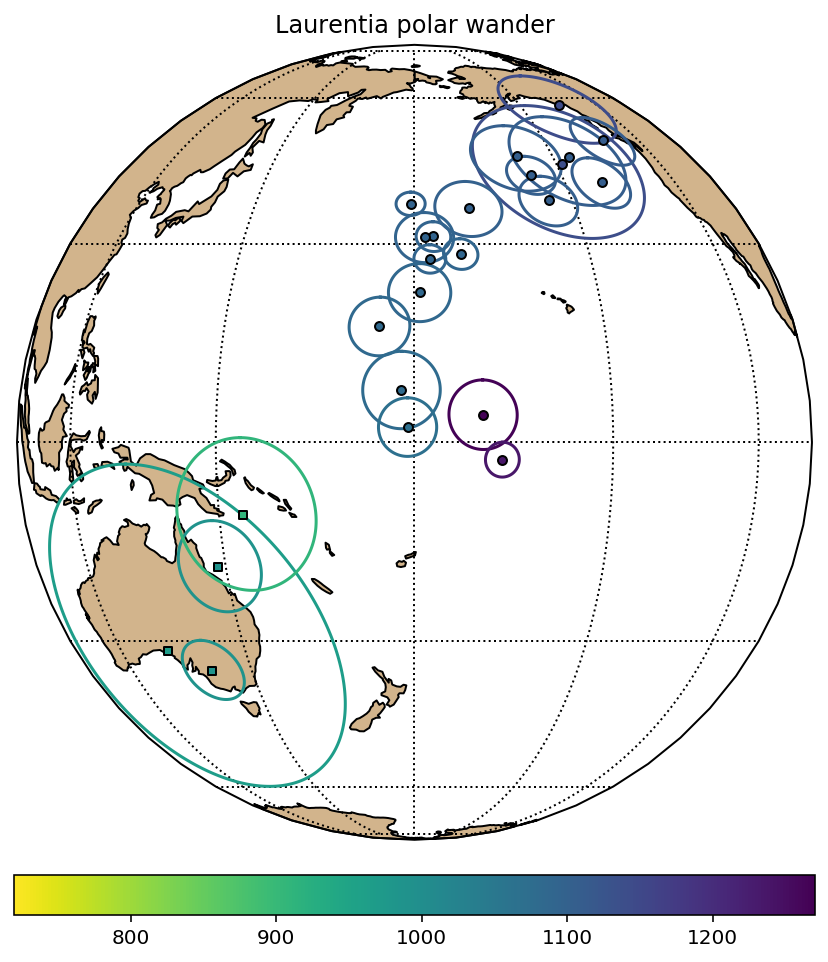

In [14]:
plt.figure(figsize=(6, 6))
m = ipmag.make_orthographic_map(central_longitude=180, central_latitude=0)

viridis = cm = plt.get_cmap('viridis') 
cNorm  = matplotlib.colors.Normalize(vmin=720, vmax=1270)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='Spectral_r')

for n in poles.index:
    rgba = scalarMap.to_rgba(poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
    hex_color
    ipmag.plot_pole(m,poles.PLon[n],poles.PLat[n],poles.A95[n],color=hex_color)
    
for n in Grenville_poles.index:
    rgba = scalarMap.to_rgba(Grenville_poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
    hex_color
    ipmag.plot_pole(m,Grenville_poles.PLon[n],Grenville_poles.PLat[n],Grenville_poles.A95[n],color=hex_color, marker = 's')
    
scalarMap.set_array(np.linspace(720,1110))    
plt.colorbar(scalarMap,orientation='horizontal',fraction=0.046, pad=0.04)
plt.title('Laurentia polar wander')
# plt.savefig('../figure/Logan_Kewee_Grenville_Loop.pdf', bbox_inches='tight')
plt.show()

<Figure size 432x432 with 0 Axes>

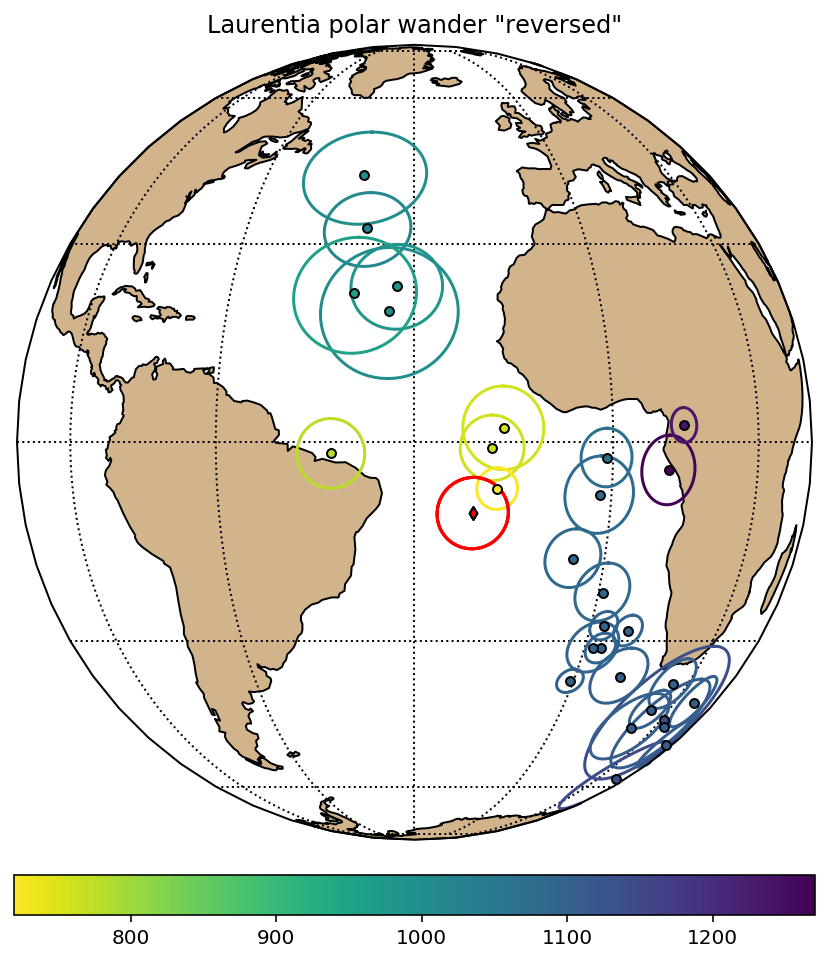

In [5]:
plt.figure(figsize=(6, 6))
m = ipmag.make_orthographic_map(central_longitude=330, central_latitude=0)

viridis = cm = plt.get_cmap('viridis') 
cNorm  = matplotlib.colors.Normalize(vmin=720, vmax=1270)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='Spectral_r')

for n in poles.index:
    rgba = scalarMap.to_rgba(poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
    hex_color
    ipmag.plot_pole(m,poles.PLon[n]-180,-poles.PLat[n],poles.A95[n],color=hex_color)
ipmag.plot_pole(m, 338.6, -10.3, 5.2, marker = 'd', color = 'r', label = 'Halls P pole')
ipmag.plot_pole(m, 338.6, -10.3, 5.2, marker = 'd', color = 'r', label = 'Halls P pole')
ipmag.plot_pole(m, 338.6, -10.3, 5.2, marker = 'd', color = 'r', label = 'Halls P pole')



scalarMap.set_array(np.linspace(720,1110))    
plt.colorbar(scalarMap,orientation='horizontal',fraction=0.046, pad=0.04)
plt.title('Laurentia polar wander "reversed"')
# plt.savefig('../figure/Logan_Kewee_Grenville_Loop_rev.pdf', bbox_inches='tight')
plt.show()

<Figure size 432x432 with 0 Axes>

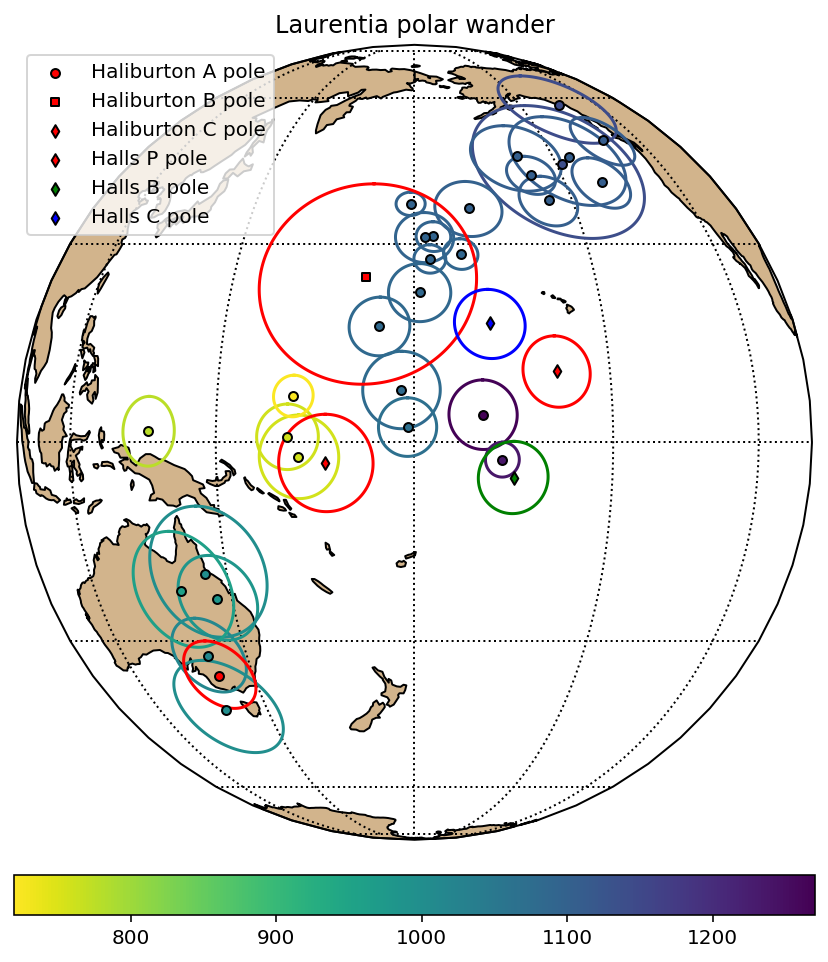

In [6]:
plt.figure(figsize=(6, 6))
m = ipmag.make_orthographic_map(central_longitude=180, central_latitude=0)

viridis = cm = plt.get_cmap('viridis') 
cNorm  = matplotlib.colors.Normalize(vmin=720, vmax=1270)
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='Spectral_r')

for n in poles.index:
    rgba = scalarMap.to_rgba(poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
    hex_color
    ipmag.plot_pole(m,poles.PLon[n],poles.PLat[n],poles.A95[n],color=hex_color)
scalarMap.set_array(np.linspace(720,1110))    

ipmag.plot_pole(m, 142.5, -36, 6, marker = 'o', color = 'r', label = 'Haliburton A pole')
ipmag.plot_pole(m, 172.3, 24.5, 16, marker = 's', color = 'r', label = 'Haliburton B pole')
ipmag.plot_pole(m, 167, -3, 7, marker = 'd', color = 'r', label = 'Haliburton C pole')

ipmag.plot_pole(m, 180-338.6, 10.3, 5.2, marker = 'd', color = 'r', label = 'Halls P pole')
ipmag.plot_pole(m, 180-345.5, -5.1, 5.2, marker = 'd', color = 'g', label = 'Halls B pole')
ipmag.plot_pole(m, 180-348.5, 17.4, 5.2, marker = 'd', color = 'b', label = 'Halls C pole')


plt.colorbar(scalarMap,orientation='horizontal',fraction=0.046, pad=0.04)
plt.title('Laurentia polar wander')
plt.legend()
# plt.savefig('../figure/Buchan1978_components.pdf', bbox_inches='tight')
plt.show()